__GRIP: The Sparks Foundation__


__Task 3-Data Exploration on dataset 'SampleSuperstore'__


_Author: Anagha B Santhosh_

In [9]:
#Impoting libraries
import pandas as pd
import numpy as np
import seaborn as sns;sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [29]:
import os
data = ('SampleSuperstore.csv')


In [62]:
#importing dataset
store_df =pd.read_csv('SampleSuperstore.csv')
store_df.head(3)




,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


__INSPECTION__

In [9]:
store_df.shape

(9994, 13)

In [64]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [63]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [50]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [65]:
#Checking null counts
pd.DataFrame(store_df.isnull().sum(),columns =['Number of missing Values'])


,Number of missing Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [66]:
#Checkin the Unique Values
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

__Cleaning the Data__

__Removing the Column Country__

In [91]:
store_df.duplicated()
store_df.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [70]:
store_df.duplicated().sum()

17

In [71]:
store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [72]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [73]:
store_df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [74]:
store_df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [75]:
data = store_df.drop_duplicates(keep='first')

In [77]:
dt=store_df.sort_values(by='Sales',ascending=False)

In [78]:
dt.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856


In [80]:
dt.shape

(9994, 12)

__EXPLORATORY DATA ANALYSIS__

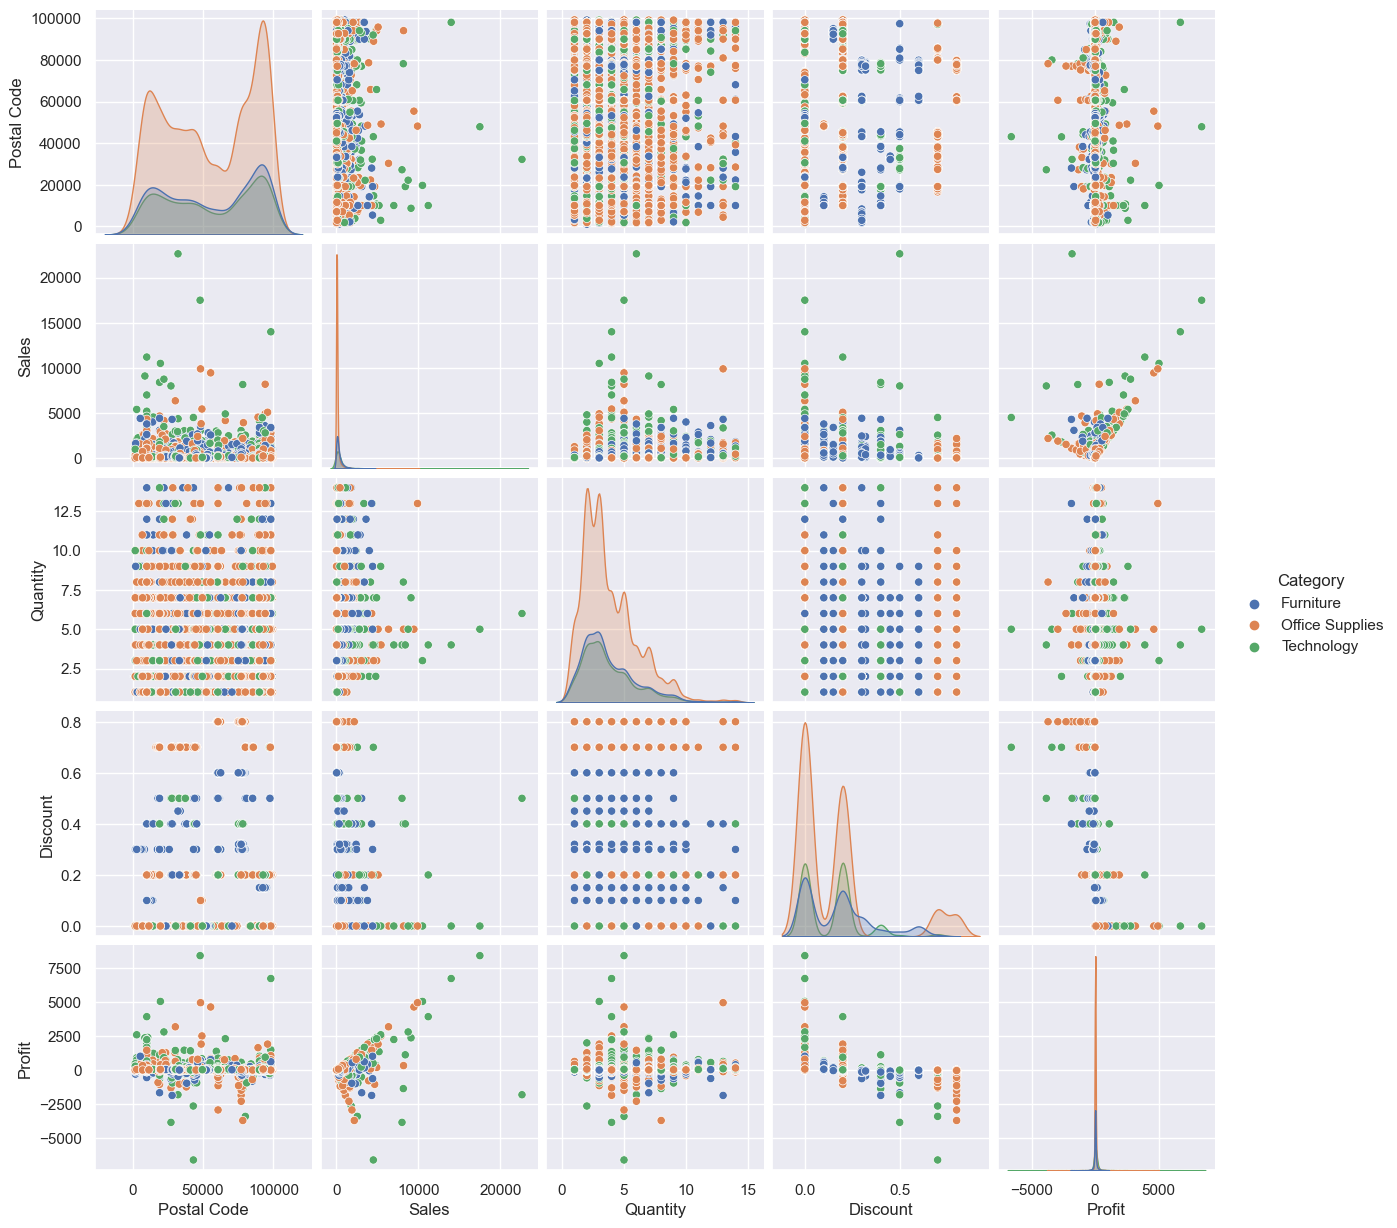

In [83]:
sns.pairplot(store_df, hue="Category")

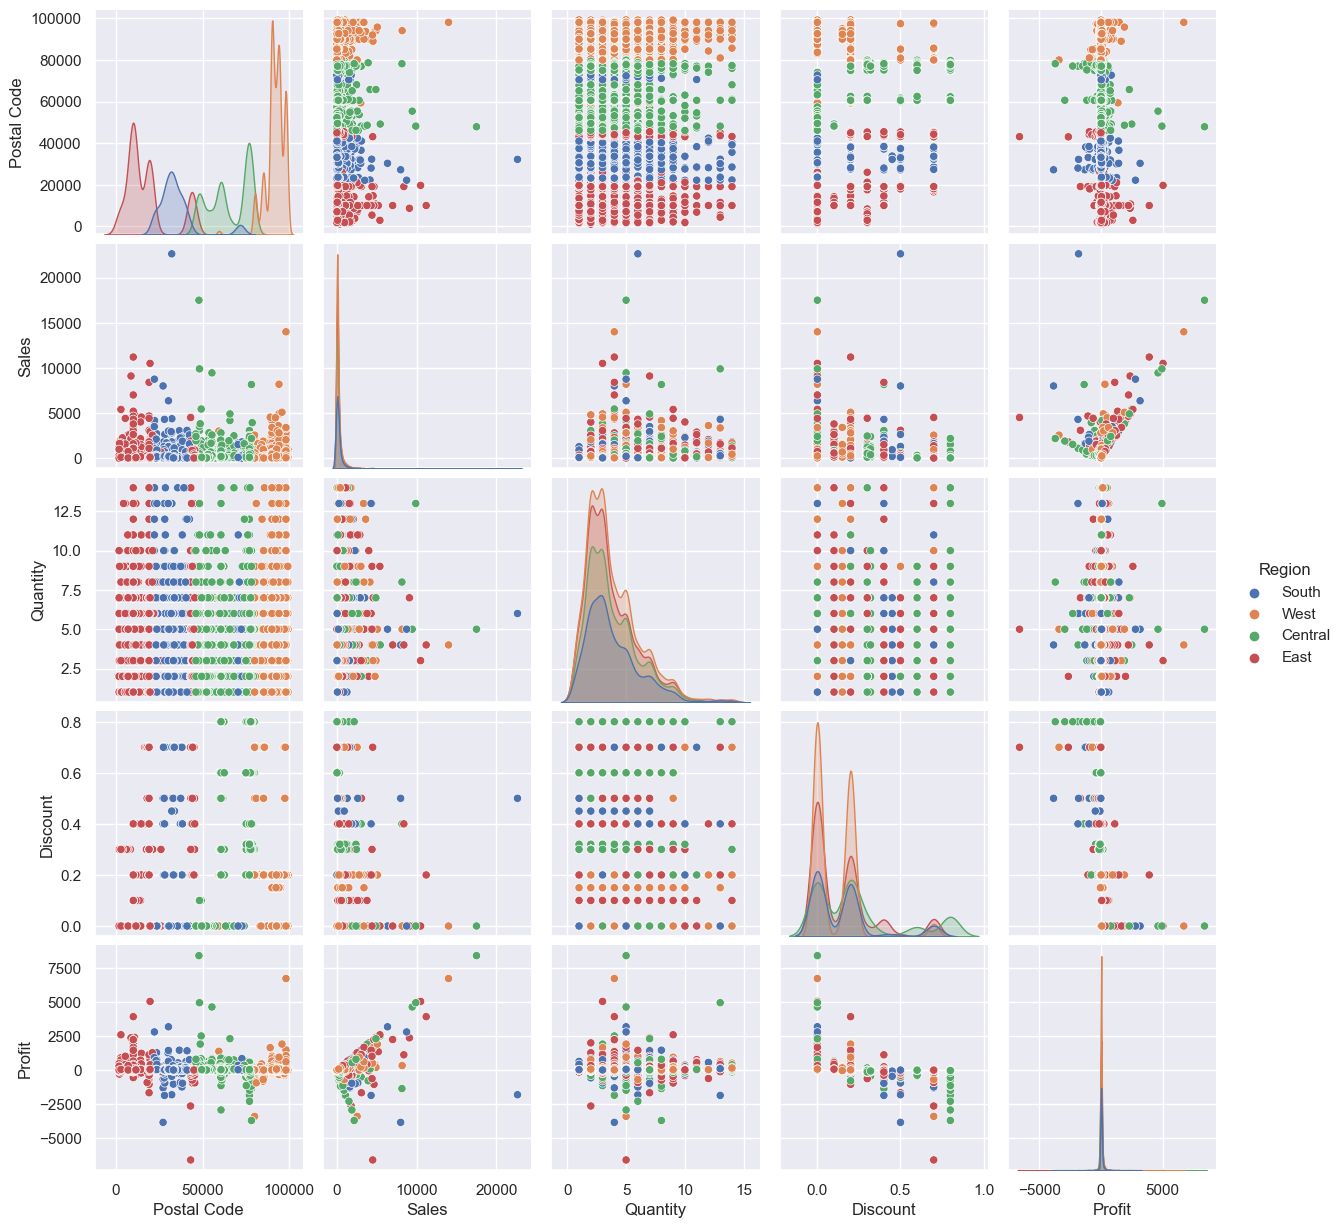

In [84]:
sns.pairplot(store_df, hue="Region")


In [103]:
#Check correlation
subset=store_df[['Postal Code','Sales','Quantity','Discount','Profit']]
corr_matrix = subset.corr()
print(corr_matrix)


             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000


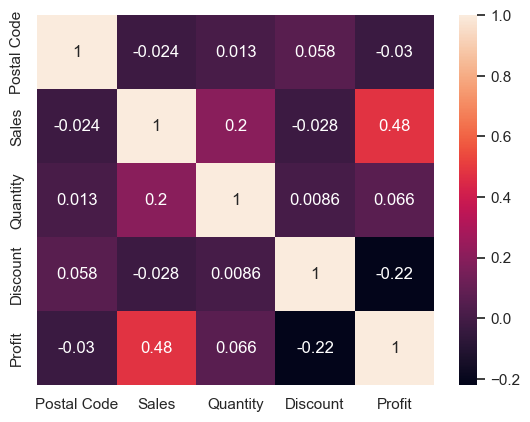

In [104]:
subset=store_df[['Postal Code','Sales','Quantity','Discount','Profit']]
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

 Here,brightest colours shows the strong correlation and dark colours shows no correlation


__From the heatmap,we can infer the following points:__

Sales and Profit are moderately related

Discount and Profit are negatively related

Quantity and profit are less moderately correlated

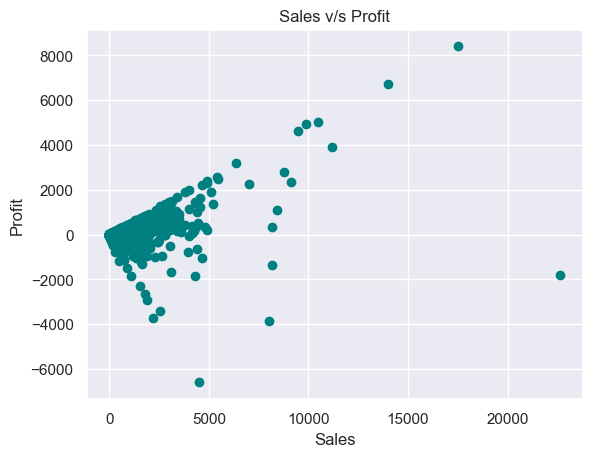

In [108]:
plt.scatter(store_df['Sales'],store_df['Profit'],c ='Teal')     
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()                     
                     

In [40]:
(store_df['Ship Mode'].value_counts()/store_df.shape[0])*100

Ship Mode
Standard Class    59.633950
Second Class      19.519308
First Class       15.396219
Same Day           5.450523
Name: count, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Count'>

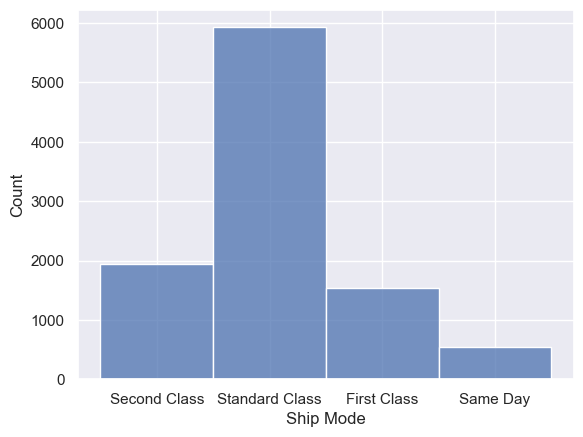

In [41]:
sns.histplot(store_df['Ship Mode'])

In [42]:
(store_df['Segment'].value_counts()/store_df.shape[0])*100

Segment
Consumer       51.890587
Corporate      30.249397
Home Office    17.860016
Name: count, dtype: float64

<Axes: xlabel='Segment', ylabel='Count'>

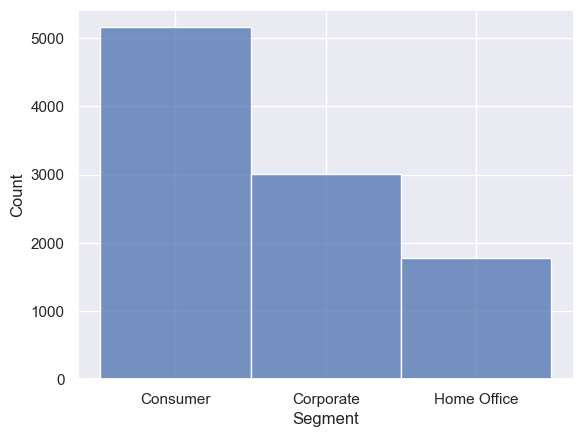

In [43]:
sns.histplot(store_df['Segment'])

In [45]:
(store_df['Category'].value_counts()/store_df.shape[0])*100

Category
Office Supplies    60.197104
Furniture          21.259051
Technology         18.543846
Name: count, dtype: float64

<Axes: xlabel='Category', ylabel='Count'>

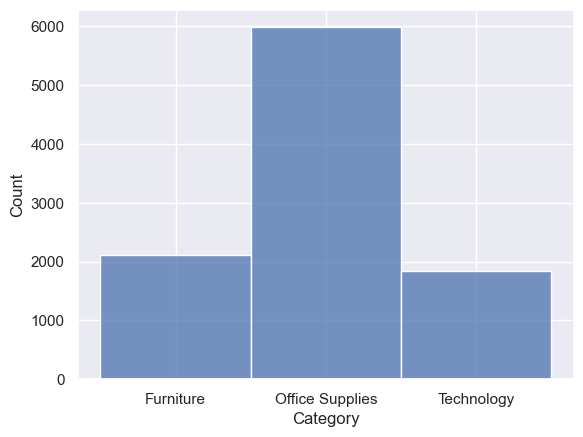

In [46]:
sns.histplot(store_df['Category'])

In [47]:
(store_df['Sub-Category'].value_counts()/store_df.shape[0])*100

Sub-Category
Binders        15.265487
Paper          13.515688
Furnishings     9.593725
Phones          8.930008
Storage         8.497586
Art             7.974658
Accessories     7.773532
Chairs          6.184634
Appliances      4.686243
Labels          3.610217
Tables          3.207965
Envelopes       2.554304
Bookcases       2.272727
Fasteners       2.182220
Supplies        1.910700
Machines        1.156476
Copiers         0.683829
Name: count, dtype: float64

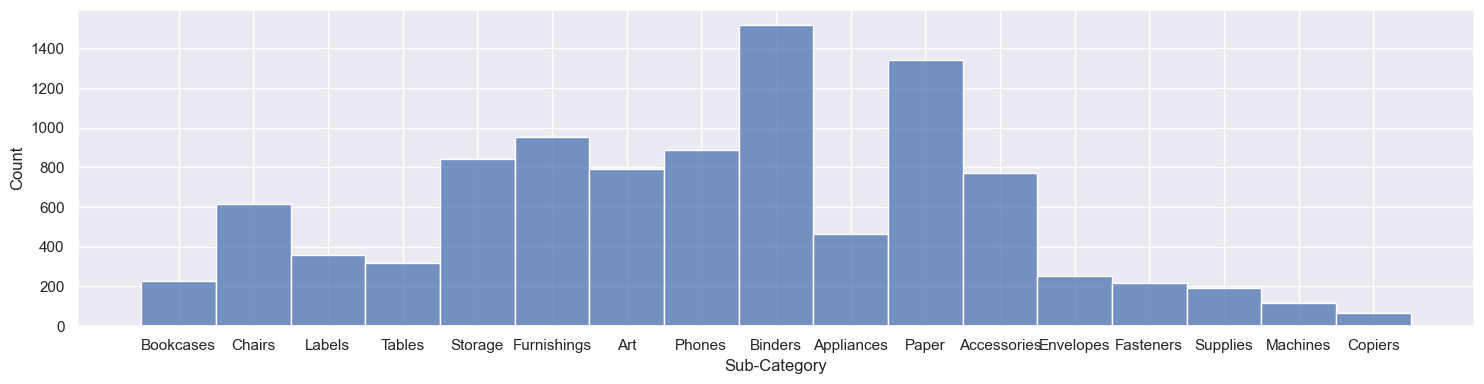

In [48]:
sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(15,4)
plt.tight_layout()

<Axes: xlabel='Category'>

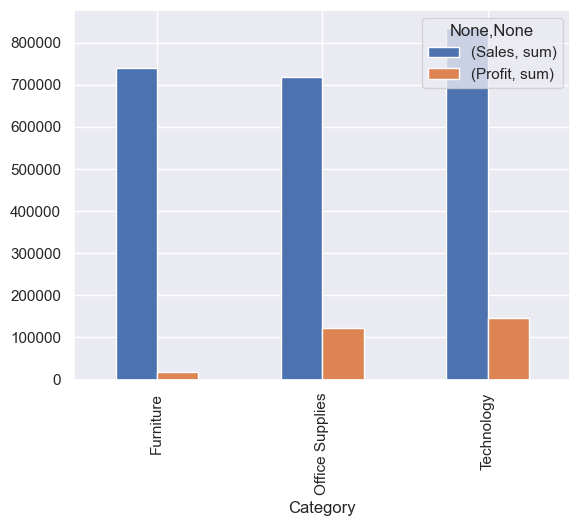

In [49]:
store_df.groupby('Category')[['Sales','Profit']].agg(['sum']).plot.bar()

In [23]:
non_numeric_cols = store_df.select_dtypes(exclude=['int' , 'float']).columns
print(non_numeric_cols)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')


<Axes: xlabel='Region', ylabel='count'>

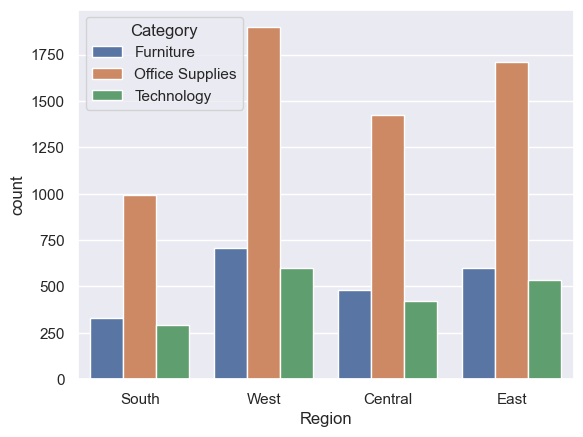

In [93]:
sns.countplot(x=store_df['Region'],hue = store_df['Category'])

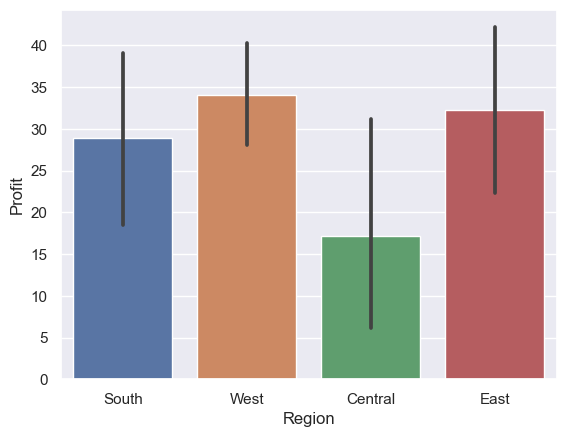

In [54]:
sns.barplot(x='Region',y='Profit',data=store_df)
plt.show()

In [70]:
store_df.pivot_table(values = 'Profit',index = 'Segment', columns = 'Discount' ,aggfunc = 'median')


Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,16.1914,62.0390,5.83920,6.0555,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.77265
Corporate,16.5888,46.7908,26.27735,6.7188,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.71300
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2220,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.03280


In [71]:
store_df.pivot_table(values = 'Sales',index = 'Segment', columns = 'Discount' ,aggfunc = 'median')

Discount,0.00,0.10,0.15,0.20,0.30,0.32,0.40,0.45,0.50,0.60,0.70,0.80
Segment,,,,,,,,,,,,
Consumer,52.860,365.598,307.666,52.204,361.011,328.3992,289.404,353.24025,292.100,23.526,12.051,8.610
Corporate,59.520,245.646,480.165,52.512,347.361,307.6660,338.679,562.29250,302.450,21.936,12.060,9.312
Home Office,50.745,191.646,411.332,52.752,366.744,341.9992,212.856,427.23725,433.935,22.608,12.957,8.769


__CONCLUTION__



Company is offering more Discount on Office Suppliers and Furniture category.

The maximum quantity of product in demand was in range 2-4.



The mode of shipping does not affect much to the sales

Correlation matrix shows positive relationship between Profit&Sales,Quantity&Sales.

__Thank You__